<a id="top"></a>
# How to discover and access data using THREDDS and OPeNDAP on the example of the Integrated climate data center

<table>
    <tr>
      <td>
      <img src='uhh-logo-16dab7756eecc70a7649a242498868c6bb37872e5eae6023b38026faeef923c3.svg'
           width=300>
      </td>
      <td>
      <img src='NFDI4Earth_logo.png'width=300>
      </td>
     </tr>
</table>


***

## What is THREDDS?

The THREDDS Data Server provides data access for scientific datasets, especially for geo-referenced
data (netCDF, HDF, GRIB, etc.). Via THREDDS you can download datasets with your web browser or
use subsets without downloading the datasets (OPeNDAP).

## 1. Datasets Overview

If you click on a THREDDS or OPeNDAP link in our data center, you will get an overview of these
datasets. E.g. if you choose ECCO-SIO, you will get a list of files with information about size and
modification date: 
http://icdc.cen.uni-hamburg.de/thredds/catalog/ftpthredds/EASYInit/ECCO/catalog.html


## 2. Browsing the Server Catalog with siphon

Instead of going through the data catlog manually, one can use the python package `siphon` to browse for datasets programatically.


In [1]:
from siphon import catalog

cat = catalog.TDSCatalog('https://icdc.cen.uni-hamburg.de/thredds/catalog.xml')
print(list(cat.catalog_refs))

ModuleNotFoundError: No module named 'siphon'

Listing datasets in folder `https://icdc.cen.uni-hamburg.de/thredds/catalog/ftpthredds/fesstval/wind_and_gust/falkenberg_sonic90m/level2/catalog.html`

In [10]:
catalog_url="https://icdc.cen.uni-hamburg.de/thredds/catalog/ftpthredds/fesstval/wind_and_gust/falkenberg_sonic90m/level2/catalog.xml"

tds = catalog.TDSCatalog(catalog_url)
datasets = list(tds.datasets)
endpts = tds.datasets.values()
datasets

['sups_rao_turb03_l2_wind_v00_20210831000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210830000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210829000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210828000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210827000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210826000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210825000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210824000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210823000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210822000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210821000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210820000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210819000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210818000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210817000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210816000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210815000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210814000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210813000000.nc',
 'sups_rao_turb03_l2_wind_v00_20210812000000.nc',


## 3. Opening datasets via OPeNDAP

### 3.1 Using Xarray 

In [11]:
import xarray as xa

dap_url="https://icdc.cen.uni-hamburg.de/thredds/dodsC/ftpthredds/fesstval/wind_and_gust/falkenberg_sonic90m/level2/sups_rao_turb03_l2_wind_v00_20210831000000.nc"
data = xa.open_dataset(dap_url)
data

<xarray.Dataset>
Dimensions:     (time: 144, nv: 2)
Coordinates:
  * time        (time) datetime64[ns] 2021-08-31T00:10:00 ... 2021-09-01
Dimensions without coordinates: nv
Data variables: (12/17)
    u           (time) float32 ...
    v           (time) float32 ...
    w           (time) float32 ...
    qc_u        (time) int8 ...
    qc_v        (time) int8 ...
    qc_w        (time) int8 ...
    ...          ...
    G           (time) float32 ...
    lon         float64 ...
    lat         float64 ...
    height      float64 ...
    zsl         float64 ...
    time_bnds   (time, nv) datetime64[ns] ...
Attributes:
    title:            Ultrasonic anemometer data with wind and gust products,...
    description:      Daily netCDF file with quality checked data for 10 min ...
    institution:      Deutscher Wetterdienst, Meteorologisches Observatorium ...
    contact_person:   Carola Detring, carola.detring@dwd.de
    site_location:    Lindenberg, Boundary-layer field site Falkenberg
    source:           instrument: usa1_standard_1 , manufacturer: metek , Sta...
    history:          Data processed with Sonic_data_to_l0_l1_l2_v01.py
    processing_date:  Created Fri Jan 13 21:27:37 2023
    Conventions:      CF-1.8
    author:           Carola Detring, carola.detring@dwd.de
    comments:          
    licence:          For non-commercial use only. This data is subject to th...

### 3.2 Using netCDF4

Datasets can also be opened using the netCDF4 library directly. Besides a local filename, the `Dataset()` function takes an OPeNDAP-URL as argument. 

/var/folders/_j/n5kznlm13fbgm7njdx7g82s00000gq/T/ipykernel_80867/1717365748.py:9: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  theta = dataset.variables['THETA'][0,0,:,:] # first time step, first depth level


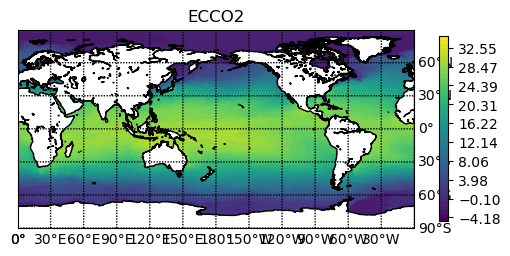

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import time
import random

dataset = Dataset('http://icdc.cen.uni-hamburg.de/thredds/dodsC/ecco2-temp-all')
theta = dataset.variables['THETA'][0,0,:,:] # first time step, first depth level
lat = dataset.variables['LATITUDE_T'][:]
lon = dataset.variables['LONGITUDE_T'][:]
theta[theta<-1000]=np.NaN
# basemap instance with lat/lon corner values
m = Basemap(projection='cyl',llcrnrlat=-90,llcrnrlon=0,urcrnrlat=90,urcrnrlon=360,resolution='l')
# meshgrid returns coordinate matrices from 2 vectors
# basemap instance can take 2 arguments to convert lat,lon matrices to x,y
x, y = m(*np.meshgrid(lon,lat))
# min, max, step width for color bar (unit Kelvin)
ps=np.linspace(-5,35,50)
m.contourf(x,y,np.squeeze(theta),ps)
m.drawcoastlines()
m.drawmeridians(np.arange(0, 360, 30), labels=[1,0,0,1])
m.drawparallels(np.arange(-90, 90, 30), labels=[0,1,1,0])
plt.title('ECCO2')
plt.colorbar(shrink=0.5)
plt.show()

## Weitere Materialien

- Example for loading climate data from the Climate model Intercomparison project (CMIP6): http://gallery.pangeo.io/repos/pangeo-gallery/cmip6/search_and_load_with_esgf_opendap.html
- Siphon-Documentation: https://unidata.github.io/siphon/latest/api/index.html